In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from src import plotting
from src.crypto_data import BinanceDataManager

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
df = BinanceDataManager.data_to_df(
    "/Users/ivankyulev/Projects/Notebooks/data/futures/um/monthly/klines/RENDERUSDT/1h"
)

In [3]:
# Here we add 3x 7day Moving Average of Volume
df["Vol_3x_7ma"] = df["Volume"].rolling(7).mean() * 3

In [4]:
df

,Open,High,Low,Close,Volume,Quote Volume,Count,Taker Buy Volume,Taker Buy Quote Volume,Vol_3x_7ma
Date,,,,,,,,,,
2024-07-26 10:00:00,6.70,7.04,6.56,6.89,"703,367.90","4,859,151.09",18387,"318,979.60","2,203,880.20",NaN
2024-07-26 11:00:00,6.88,6.99,6.74,6.80,"502,967.80","3,451,791.71",12190,"239,657.20","1,645,912.64",NaN
2024-07-26 12:00:00,6.80,6.93,6.70,6.83,"502,463.20","3,419,482.37",14188,"244,108.80","1,661,595.75",NaN
2024-07-26 13:00:00,6.83,6.92,6.78,6.87,"263,049.00","1,804,085.75",9360,"124,004.80","850,510.12",NaN
2024-07-26 14:00:00,6.87,6.91,6.73,6.81,"283,719.60","1,927,535.72",8230,"129,927.10","882,668.02",NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-30 19:00:00,6.54,6.55,6.49,6.51,"234,217.90","1,526,196.64",10439,"132,626.40","864,198.50","1,180,158.69"
2024-09-30 20:00:00,6.51,6.63,6.50,6.60,"365,790.20","2,406,024.85",13482,"181,676.40","1,195,069.43","1,160,393.70"
2024-09-30 21:00:00,6.60,6.64,6.55,6.63,"307,295.30","2,028,618.84",10333,"157,832.30","1,041,942.18","1,036,715.14"


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Quote Volume,Count,Taker Buy Volume,Taker Buy Quote Volume,Vol_3x_7ma
count,"1,598.00","1,598.00","1,598.00","1,598.00","1,598.00","1,598.00","1,598.00","1,598.00","1,598.00","1,592.00"
mean,5.28,5.33,5.24,5.28,"396,622.15","2,103,410.26","10,663.92","193,811.68","1,027,294.63","1,189,284.05"
std,0.69,0.69,0.69,0.69,"350,004.45","1,883,721.37","7,517.76","171,186.14","918,608.70","788,699.23"
min,3.57,3.77,3.42,3.57,"27,391.50","140,670.53","1,137.00","10,588.10","47,698.89","143,358.60"
25%,4.77,4.80,4.73,4.77,"187,758.30","945,673.95","5,726.25","91,272.05","464,562.38","670,376.54"
50%,5.08,5.11,5.03,5.08,"310,075.00","1,617,858.09","8,826.50","150,741.35","784,693.52","1,002,397.99"
75%,5.88,5.97,5.82,5.88,"487,280.53","2,639,452.42","13,411.25","239,381.90","1,279,560.71","1,509,625.24"
max,6.91,7.04,6.84,6.91,"6,004,986.70","34,175,442.96","115,071.00","2,878,490.30","16,380,795.12","6,148,780.93"


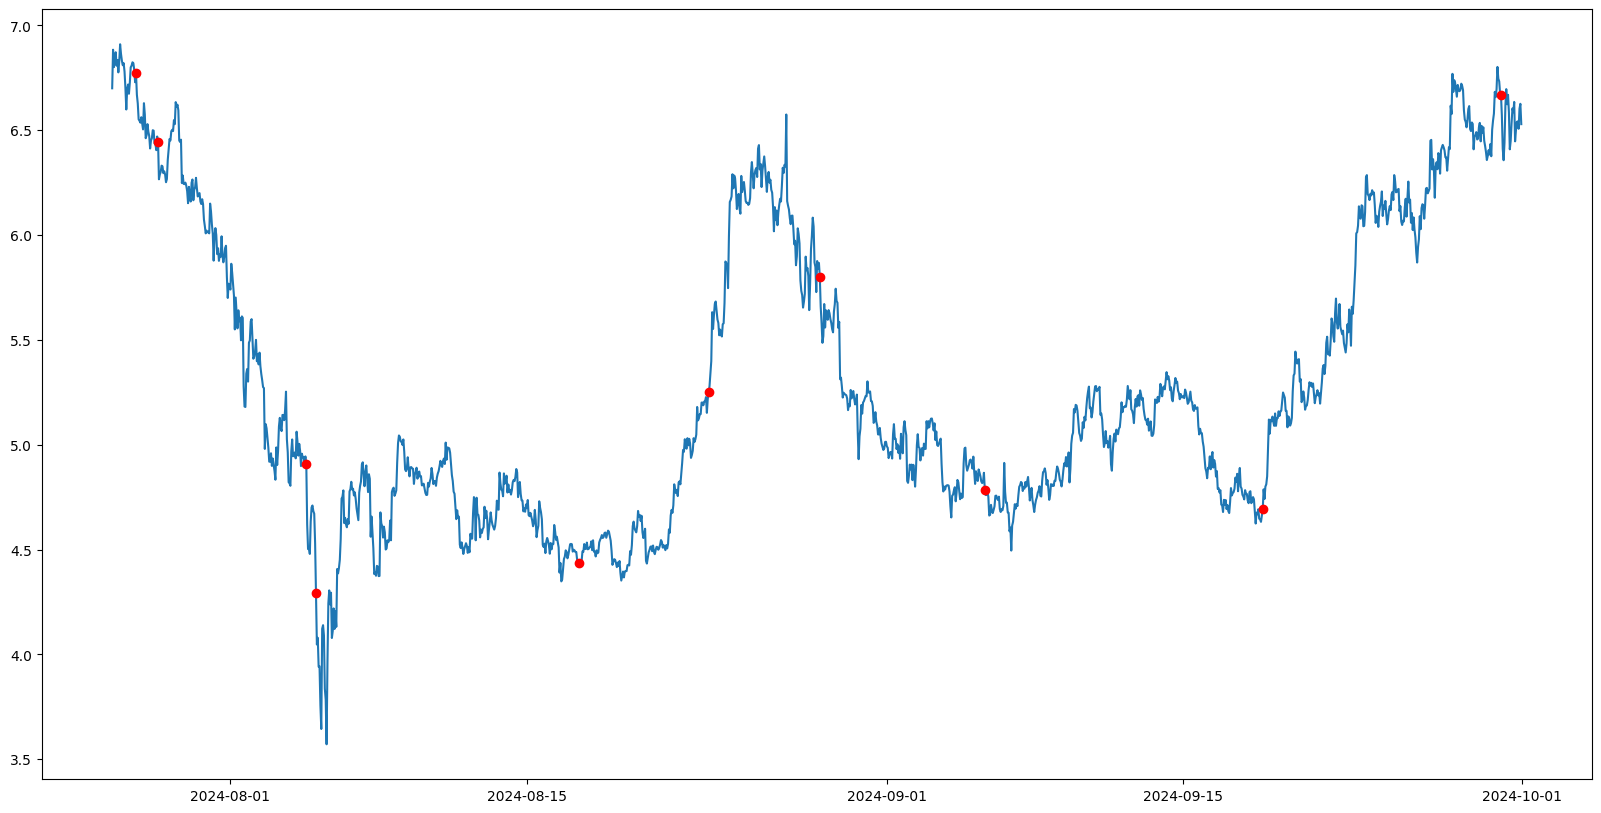

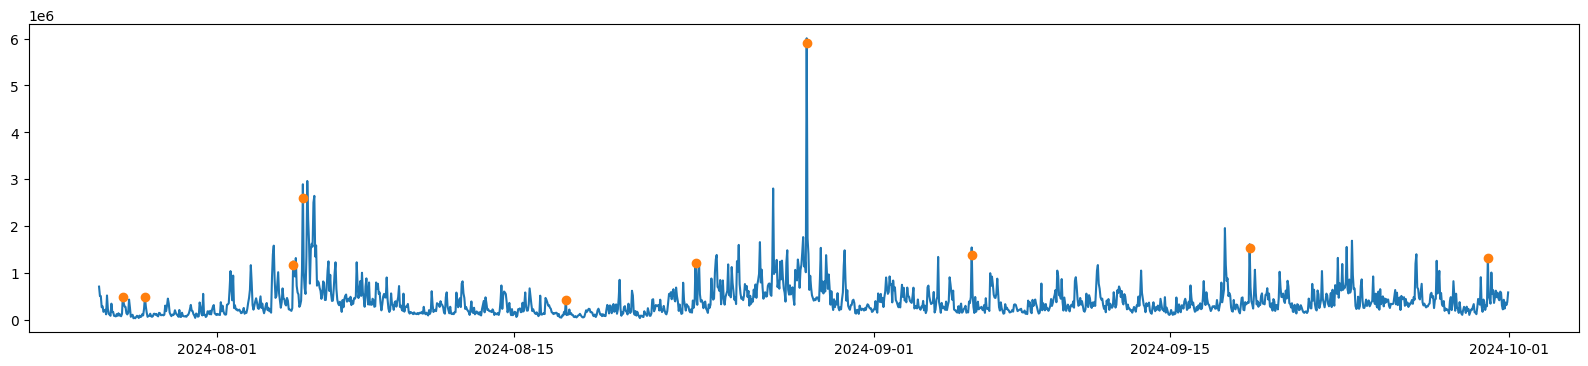

In [48]:
df_buy_signal = df[df["Volume"] > df["Vol_3x_7ma"]]
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Open'])
plt.plot(df_buy_signal.index, df_buy_signal["Open"], marker='o', linestyle='None', color='red')

plt.figure(figsize=(20, 4))
plt.plot(df.index, df['Volume'])
plt.plot(df_buy_signal.index, df_buy_signal["Vol_3x_7ma"], marker='o', linestyle='None')

In [13]:
df_filtered = df[df["Volume"] > df["Vol_3x_7ma"]]
plt.plot(df_filtered.index, df_filtered["Vol_3x_7ma"], marker='o', label='Data Points')
df_filtered

,Open,High,Low,Close,Volume,Quote Volume,Count,Taker Buy Volume,Taker Buy Quote Volume,Vol_3x_7ma
Date,,,,,,,,,,
2024-07-27 13:00:00,6.77,6.81,6.62,6.67,"518,896.50","3,489,872.58",10284,"223,253.90","1,501,586.04","479,992.67"
2024-07-28 14:00:00,6.45,6.45,6.19,6.27,"480,942.80","3,034,082.88",10773,"200,969.60","1,268,566.06","480,087.69"
2024-08-04 14:00:00,4.91,4.92,4.61,4.62,"1,240,203.60","5,853,294.35",25109,"489,367.40","2,312,542.20","1,160,421.17"
2024-08-05 01:00:00,4.29,4.31,3.80,4.05,"2,888,377.10","11,713,415.80",50063,"1,283,532.20","5,218,457.10","2,595,477.34"
2024-08-17 11:00:00,4.43,4.44,4.39,4.43,"422,045.60","1,858,469.72",5689,"232,812.10","1,025,045.59","412,711.76"
2024-08-23 14:00:00,5.25,5.45,5.21,5.28,"1,236,435.00","6,580,490.87",27509,"647,204.10","3,446,455.11","1,201,266.09"
2024-08-28 20:00:00,5.80,6.00,5.51,5.66,"6,004,986.70","34,175,442.96",115071,"2,878,490.30","16,380,795.12","5,904,683.70"
2024-09-05 15:00:00,4.79,4.90,4.71,4.76,"1,538,964.20","7,367,394.36",28306,"748,718.30","3,587,709.47","1,379,164.76"
2024-09-18 18:00:00,4.69,4.86,4.68,4.79,"1,607,770.10","7,678,283.58",33836,"739,509.60","3,532,673.02","1,532,088.04"
